# Применение фильтров частот к записанному голосовому сигналу
Одно из основных применений фильтров частот - модификация звуковых сигналов для удаления лишних или ненужных частот из звука.  
Для начала определим некоторые из констант, такие как длина фильтра (выше длина - выше точность фильтрации), звуковой файл для обработки, а также частоты для фильтров.

In [1]:
# Файл для чтения
source_file = "data/rec.wav"

# длина фильтра
m = 64

# частоты для среза
LPF_Fcut = 300
HPF_Fcut = 300
BPF_Fcut1 = 250
BPF_Fcut2 = 750
BSF_Fcut1 = 300
BSF_Fcut2 = 700

Для работы нам понадобится библиотека scipy, обладающая встроенными функциями для работы с wav файлами, а также наши стандартные библиотеки для отображения графиков, преобразования Фурье, реализации импульсной реакции и фильтров

In [2]:
%matplotlib inline
import grapher
from analysis import FT, preprocessing, impulse_response
from scipy.io import wavfile

Прочитаем файл и сохраним данные и частоту дискретизации, на их основе вычислим дельта-Т, а также зададим массив для корректного отображения графиков. Предупреждения библиотеки о нераспознанных данных в конце файла можно игнорировать.

In [3]:
rate, data = wavfile.read(source_file)   # читаем файл

# Определяем константы
dT = 1 / rate
N = len(data)

xarr = [i * dT for i in range(N)]  # задаем x массив для графиков

c:\users\kell\appdata\local\programs\python\python36\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


Каналы wav файла записаны вместе, т.е. каждый срез данных - это массив байт размерностью количество каналов, и таких массивов столько, какова длительность файла. Для вычисления количества каналов можно разделить общий размер массива на его длину, а затем в отдельные массивы поместим данные каждого канала.

In [4]:
channels = []
nchs = int(data.size / len(data))
if nchs > 1:
	for i in range(nchs):
		channels.append(data[:,i])
else:
	channels.append(data[:])

Далее предполагается работать отдельно с каждым каналом, однако для сокращения записи продемонстируем работу с одним каналом, т.к. обработка остальных каналов осуществляется аналогично.

In [5]:
data = channels[0]

Далее создадим фильтры для обработки и применим их к данным. После применения необходимо вырезать из полученного сигнала первые m и последние m + 1 значений

In [6]:
LPF = preprocessing.LPF(Fcut=LPF_Fcut, dT=dT, m=m)
HPF = preprocessing.HPF(Fcut=HPF_Fcut, dT=dT, m=m)
BPF = preprocessing.BPF(Fcut1=BPF_Fcut1, Fcut2=BPF_Fcut2, dT=dT, m=m)
BSF = preprocessing.BSF(Fcut1=BSF_Fcut1, Fcut2=BSF_Fcut2, dT=dT, m=m)

# Применяем LPF
lpf_data = impulse_response.process(data, LPF)
lpf_data = lpf_data[m: -m - 1]

# Применяем HPF
hpf_data = impulse_response.process(data, HPF)
hpf_data = hpf_data[m: -m - 1]

# Применяем BPF
bpf_data = impulse_response.process(data, BPF)
bpf_data = bpf_data[m: -m - 1]

# Применяем BSF
bsf_data = impulse_response.process(data, BSF)
bsf_data = bsf_data[m: -m - 1]

Для визуализации данных применим преобразование Фурье к исходным данным, а также зададим функцию для стандартизированного вывода графиков.

In [7]:
data_ft = FT.fourier_transform(data, dT)
data_xarr = [i * data_ft.deltaF for i in range(len(data))]

# Функция для отображения данных
def data_grapher(fltr, fltr_ft: FT.FT_result):
	grapher.set_subplot(1, x_arr=xarr,
	                    y_arr=data)
	grapher.set_subplot(2, x_arr=data_xarr,
	                    y_arr=data_ft.frequencies,
	                    xmin=0, xmax=data_ft.borderF)
	grapher.set_subplot(3, x_arr=xarr,
	                    y_arr=fltr)
	grapher.set_subplot(4, x_arr=data_xarr,
	                    y_arr=fltr_ft.frequencies,
	                    xmin=0, xmax=fltr_ft.borderF)

Отобразим график данных после применения LPF...

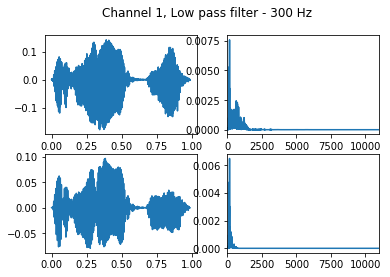

In [8]:
lpf_data_ft = FT.fourier_transform(lpf_data, dT)
grapher.init(1, "Channel {}, Low pass filter - {} Hz".format(i, LPF_Fcut))
data_grapher(lpf_data, lpf_data_ft)
grapher.show()

...HPF...

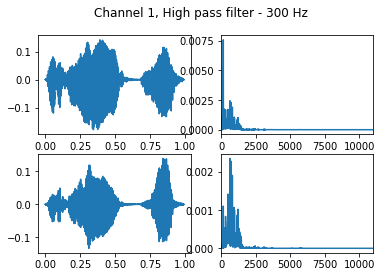

In [9]:
hpf_data_ft = FT.fourier_transform(hpf_data, dT)
grapher.init(2, "Channel {}, High pass filter - {} Hz".format(i, HPF_Fcut))
data_grapher(hpf_data, hpf_data_ft)
grapher.show()

...BPF...

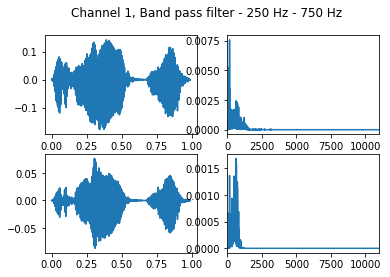

In [10]:
bpf_data_ft = FT.fourier_transform(bpf_data, dT)
grapher.init(3, "Channel {}, Band pass filter - {} Hz - {} Hz".format(i, BPF_Fcut1, BPF_Fcut2))
data_grapher(bpf_data, bpf_data_ft)
grapher.show()

...и BSF.

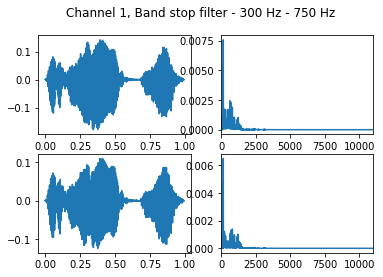

In [11]:
bsf_data_ft = FT.fourier_transform(bsf_data, dT)
grapher.init(4, "Channel {}, Band stop filter - {} Hz - {} Hz".format(i, BSF_Fcut1, BPF_Fcut2))
data_grapher(bsf_data, bsf_data_ft)
grapher.show()